# Guitar Tuner - Signal Processing 2024/2025

### Pablo Mollá

In [145]:
#!pip3 install numpy scipy matplotlib librosa

## 1. Installing libraries

First, we will make sure we have installed all the necessary libraries, including: 

- numpy (mathematical computations)
- scipy (handling WAV files and performing Fourier Transforms)
- matplotlib (to visualize the frequency spectrum)
- librosa (for more advanced audio processing, mit's optional)
- IPython.display (as well optional, but it's useful to play the audio inside the notebook)

## 2. Importing Libraries

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import fft
import librosa
import librosa.display
from IPython.display import Audio
import os

## 3. Loading the WAV Files

Let's start by loading the files.

In [147]:
# Load the wav file (change the file path to your file)
files_path_list = ['data/music.wav', 'data/noise1.wav', 'data/noise2.wav', 'data/noise3.wav','data/string_1.wav', 'data/string_2.wav', 'data/string_3.wav']
loaded_files_list = []

for file_path in files_path_list:
    data, sample_rate = librosa.load(file_path, sr=None)
    file_name = os.path.basename(file_path)
    loaded_files_list.append([data, sample_rate, file_name])

# Example to listen: music.wav
file_path = files_path_list[0]
file_name = os.path.basename(file_path)
data, sample_rate = librosa.load(file_path, sr=None)

# Print sample rate and data shape
print(f"Sample Rate: {sample_rate} Hz")
print(f"Data Shape: {data.shape}")

# Play the audio (optional)
Audio(data, rate=sample_rate)

Sample Rate: 16000 Hz
Data Shape: (140001,)


## 4. Normalize the data



- We need to normalize the data because audio files can have different bit depths (such as 16-bit or 32-bit), which affects the range of their amplitude values. 

- For example, in a 16-bit WAV file, the audio signal values range from -32,768 to 32,767, whereas in a 32-bit file, the range could be much higher. Normalizing these values ensures that all files have amplitudes within the same range (usually between -1 and 1, which is how we will proceed). 

- This consistency makes it easier to perform subsequent analysis, as all the data is scaled comparably. Hopefully, the library Librosa automatically normalizes the data.

In [148]:
# Normalize the data to range between -1 and 1
#data = data / np.max(np.abs(data))

# If the audio file has two channels (stereo), convert it to mono (librosa also converts it to mono)
#if len(data.shape) > 1:
    #data = np.mean(data, axis=1)

## 5. Plot the Audio Signal

Before analyzing the frequency, let’s visualize the time-domain waveform.

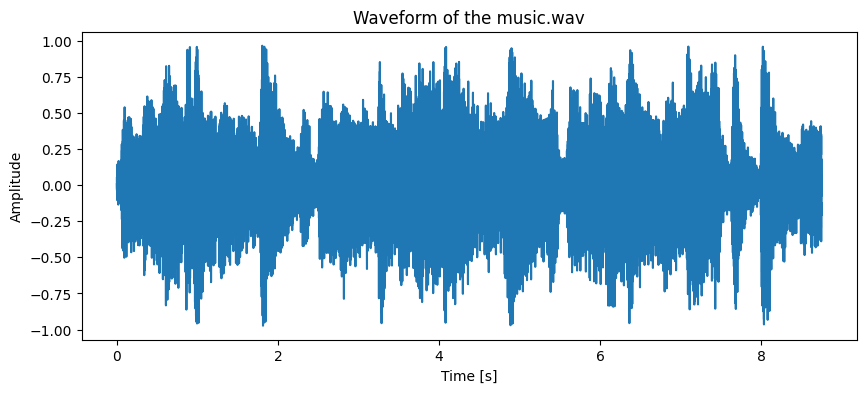

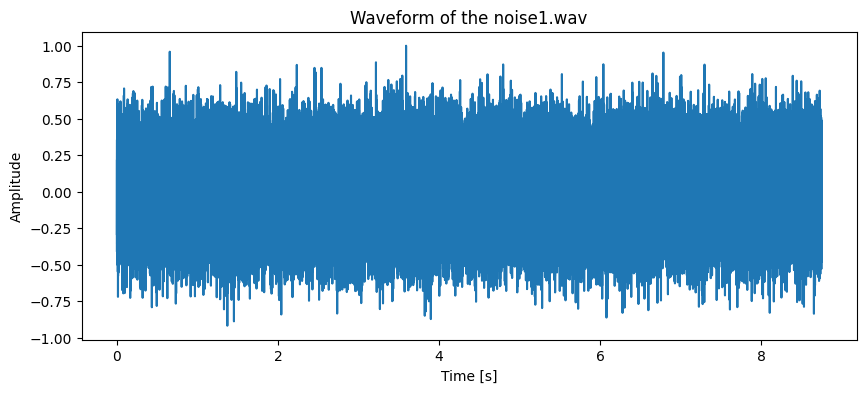

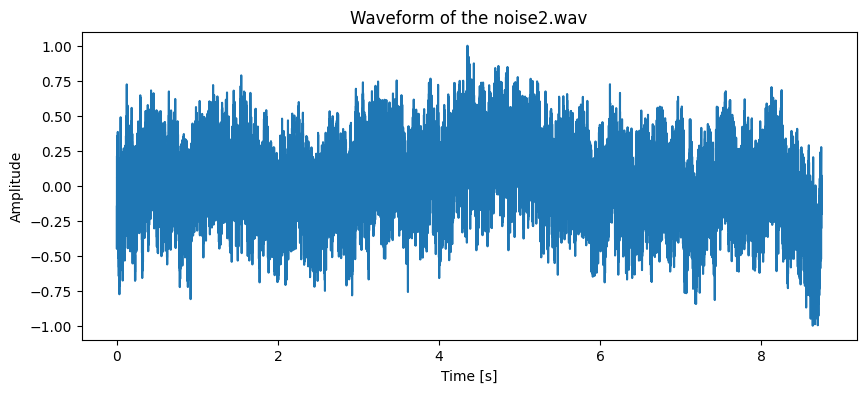

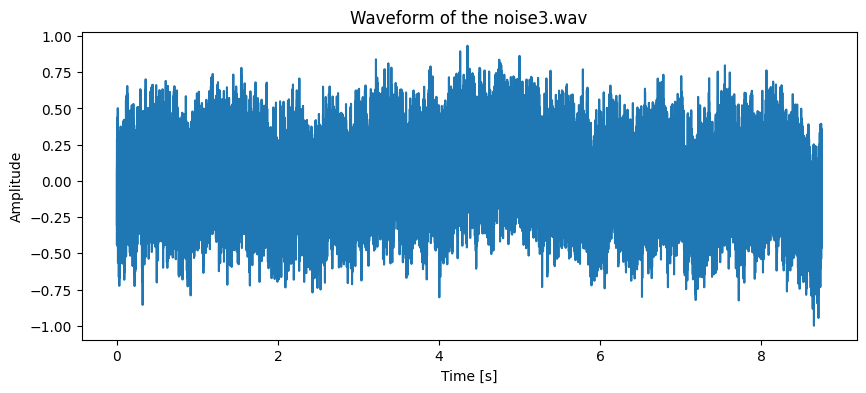

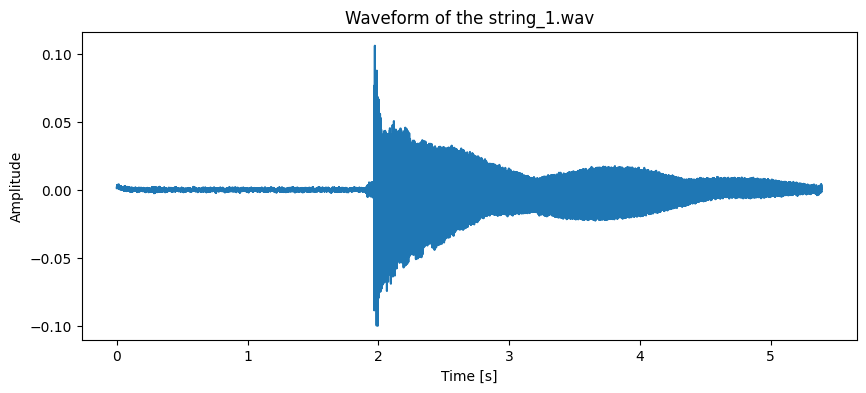

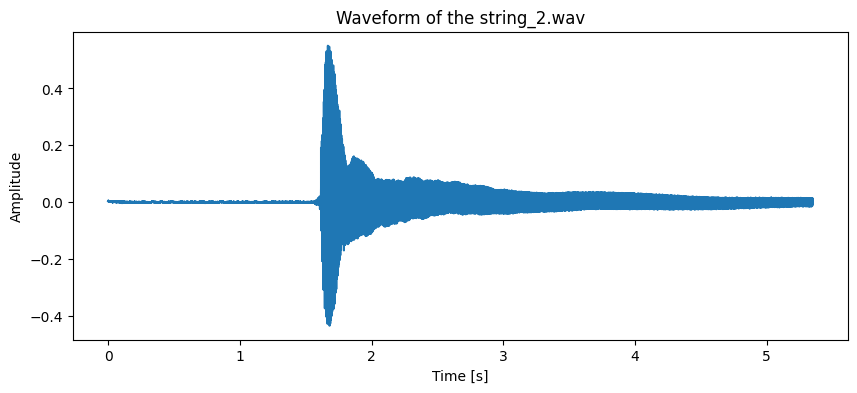

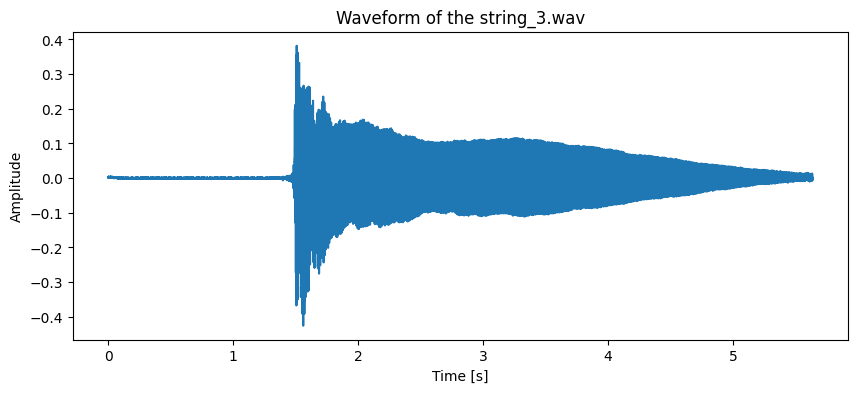

In [149]:
# Plotting all audio signals
for loaded_file in loaded_files_list:
    data = loaded_file[0]
    sample_rate = loaded_file[1]
    file_name = loaded_file[2]
    # Time values for plotting (in seconds)
    time = np.linspace(0, len(data) / sample_rate, num=len(data))

    # Plot the waveform
    plt.figure(figsize=(10, 4))
    plt.plot(time, data)
    plt.title(f"Waveform of the {file_name}")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

## 7. Fourier Transform (Spectral Analysis) & Dominant Frequency

### 7.1 Performing the Fourier Transform

- The Fourier Transform will allow us to convert the audio signal from the time domain to the frequency domain. This is done using the Fast Fourier Transform (FFT). We can extract the dominant frequencies from this analysis, but since we know we are dealing with real signals, we can just use the RFFT (Real Fast Fourier Transform) to avoid computing the complex/imaginary signals.

### 7.2 Finding the Dominant Frequency

To detect the played note, we need to identify the peak frequency in the FFT. For instance, this frequency will correspond to the fundamental frequency of the guitar string in the string audios.

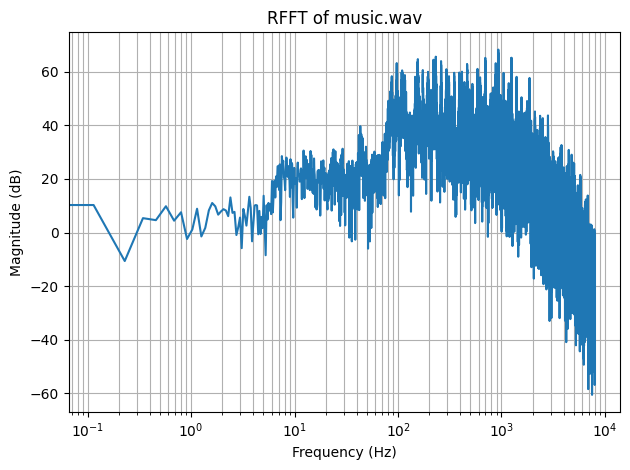

Dominant Frequency for music.wav: 932.1076278026586 Hz


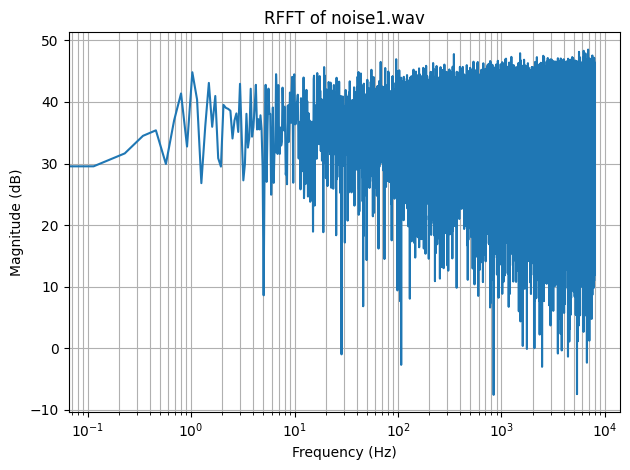

Dominant Frequency for noise1.wav: 6873.322333411904 Hz


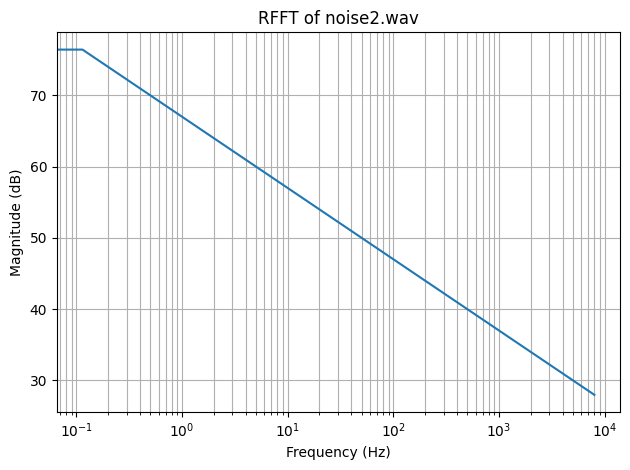

Dominant Frequency for noise2.wav: 0.11428489796501454 Hz


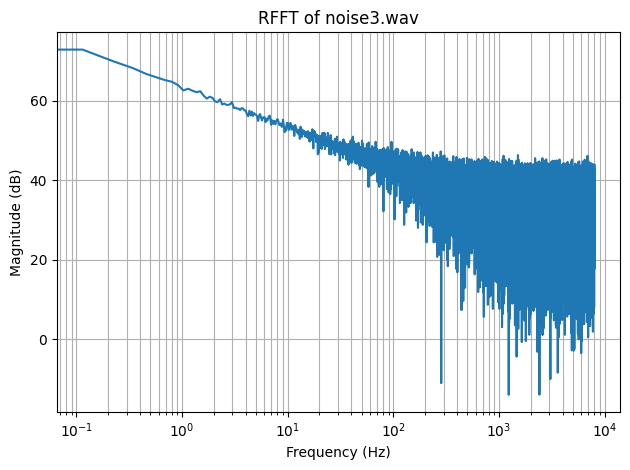

Dominant Frequency for noise3.wav: 0.11428489796501454 Hz


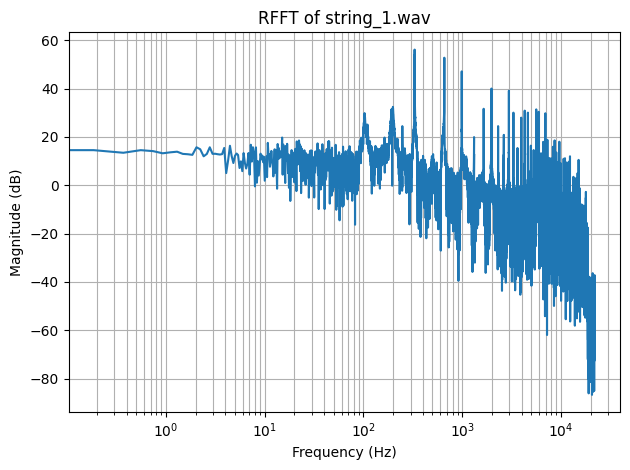

Dominant Frequency for string_1.wav: 329.68076508620686 Hz


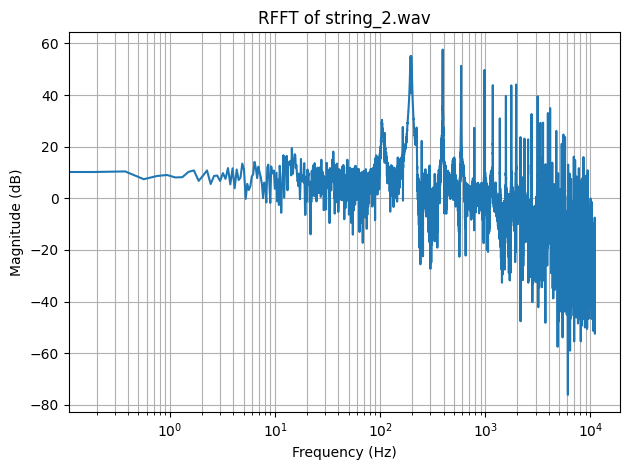

Dominant Frequency for string_2.wav: 392.14710970893543 Hz


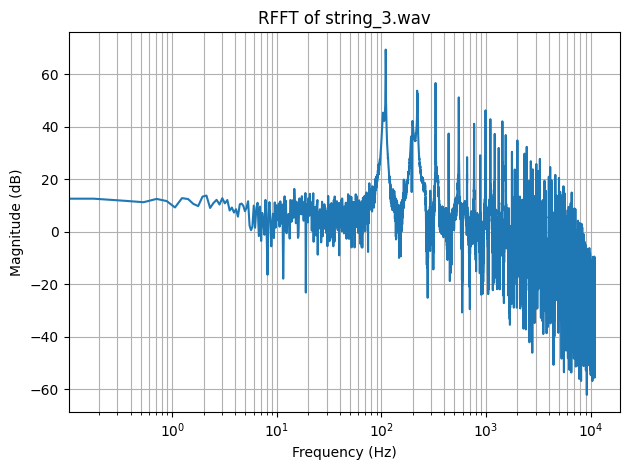

Dominant Frequency for string_3.wav: 110.12232194557035 Hz


In [150]:
for loaded_file in loaded_files_list:
    # 7.1
    data = loaded_file[0]
    sample_rate = loaded_file[1]
    file_name = loaded_file[2]
    # Number of samples
    window_length = len(data)
    spectrum = fft.rfft(data, n=window_length)
    freq = fft.rfftfreq(window_length, 1 / sample_rate)

    # Go from amplitude to magnitude in decibels
    spectrum_db = 20 * np.log10(np.abs(spectrum))

    # Display FFT
    title = f"RFFT of {file_name}"
    plt.figure()
    plt.semilogx(freq, spectrum_db)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid(which="both")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    # 7.2
    # Find the index of the peak in the FFT
    index_peak = np.argmax(np.abs(spectrum))  # Consider only the positive frequencies
    dominant_frequency = freq[index_peak]
    loaded_file.append(dominant_frequency)

    print(f"Dominant Frequency for {file_name}: {dominant_frequency} Hz")



## 8. Closest Guitar Notes

Now that we have the dominant frequency, we need to match it to the closest guitar string frequency. According to the question for this lab, the strings and correspending frequencies are the following:

- String $ \ $ Note $ \ $ Frequency (Hz) $ \ $ Accuracy (cents)
- E1 $ \ \ $ $ \ \ $ E $ \ \ $ $ \ \ $ $ \ \ $ 329.63 $ \ \ \ \ \ \ \ \ \ \ \ \ $  ±0.15
- B2 $ \ \ $ $ \ \ $ B $ \ \ $ $ \ \ $ $ \ \ $ 246.94 $ \ \ \ \ \ \ \ \ \ \ \ \ $  ±0.15
- G3 $ \ \ $ $ \ \ $ G $ \ \ $ $ \ \ $ $ \ \ $ 196.00 $ \ \ \ \ \ \ \ \ \ \ \ \ $  ±0.15
- D4 $ \ \ $ $ \ \ $ D $ \ \ $ $ \ \ $ $ \ \ $ 146.83 $ \ \ \ \ \ \ \ \ \ \ \ \ $  ±0.08
- A5 $ \ \ $ $ \ \ $ A $ \ \ $ $ \ \ $ $ \ \ $ 110.00 $ \ \ \ \ \ \ \ \ \ \ \ \ $  ±0.08
- E6 $ \ \ $ $ \ \ $ E $ \ \ $ $ \ \ $ $ \ \ $ 82.41 $ \ \ \ \ \ \ \ \ \ \ \ \ $ ±0.04




In [155]:
print(loaded_files_list[4][3])

329.68076508620686


In [152]:
# Define guitar note frequencies and 
# corresponding accuracy in cents according to provided values
guitar_notes = {
    'E1': 329.63,
    'B2': 246.94,
    'G3': 196.00,
    'D4': 146.83,
    'A5': 110.00,
    'E6': 82.41
}

accuracy_in_cents = {
    'E1': 0.15,
    'B2': 0.15,
    'G3': 0.15,
    'D4': 0.08,
    'A5': 0.08,
    'E6': 0.04
}

def find_closest_note(freq):
    closest_note = min(guitar_notes, key=lambda note: abs(guitar_notes[note] - freq))
    freq_diff = abs(guitar_notes[closest_note] - freq)
    
    if freq_diff <= accuracy_in_cents[closest_note]:
        return f"the closest note is {closest_note}, with a frequency difference of {freq_diff} Hz"
    else:
        return closest_note, freq_diff, "Out of tune."
    
# Applying the previous function
for loaded_file in loaded_files_list:
    print(f"For the audio signal {loaded_file[2]},", find_closest_note(loaded_file[3]))

For the audio signal music.wav, ('E1', np.float64(602.4776278026586), 'Out of tune.')
For the audio signal noise1.wav, ('E1', np.float64(6543.692333411904), 'Out of tune.')
For the audio signal noise2.wav, ('E6', np.float64(82.29571510203498), 'Out of tune.')
For the audio signal noise3.wav, ('E6', np.float64(82.29571510203498), 'Out of tune.')
For the audio signal string_1.wav, the closest note is E1, with a frequency difference of 0.05076508620686582 Hz
For the audio signal string_2.wav, ('E1', np.float64(62.517109708935436), 'Out of tune.')
For the audio signal string_3.wav, ('A5', np.float64(0.12232194557034859), 'Out of tune.')


## 9. Convert the frequency difference to Cents

Let's convert, even though not demanded, the difference between the detected frequency and the ideal note frequency to cents. We know that one cent equals to $\frac{1}{100th}$ of a semitone, and the formula to convert the frequency to cent can be found in [Wikipedia](https://en.wikipedia.org/wiki/Cent_(music)#:~:text=An%20octave—two%20notes%20that,is%20approximately%201.0005777895.).

In [157]:
def frequency_to_cents(detected_freq, ideal_freq):
    return 1200 * np.log2(detected_freq / ideal_freq)

# Calculate the difference in cents for all files
for loaded_file in loaded_files_list:
    dominant_frequency = loaded_file[3]
    string = "E1"
    cents_difference = frequency_to_cents(dominant_frequency, guitar_notes[string])
    print(f"Difference in cents (with respect to E1): {cents_difference:.2f} cents")


Difference in cents (with respect to E1): 1799.58 cents
Difference in cents (with respect to E1): 5258.51 cents
Difference in cents (with respect to E1): -13792.80 cents
Difference in cents (with respect to E1): -13792.80 cents
Difference in cents (with respect to E1): 0.27 cents
Difference in cents (with respect to E1): 300.66 cents
Difference in cents (with respect to E1): -1898.09 cents
